# Generalization × Anxiety analysis


# threat bias analysis study 2 (harder); n=30


Per-participant summary:
             participant  mistakes_nondangerous  mistakes_dangerous  total_mistakes  toward  away  prop_toward  prop_shared_medium_car  prop_unshared_medium_sedan  worry  somatic_anxiety  prop_shared_medium_sedan  prop_unshared_medium_car somatic_anxiety_grouped worry_grouped
57a1e03b8eccbc0001f39c13               8.000000                  12              36       0    24         72.0                    24.0                        24.0     16               11                       NaN                       NaN                     low          high
59a9c0291b7a550001d6392e              10.000000                   0              30      21     9         19.0                     6.0                         4.0      8               10                       NaN                       NaN                     low           low
5b90635a877eab0001d7ba9e               8.000000                  12              36       0    24         72.0                     NaN         

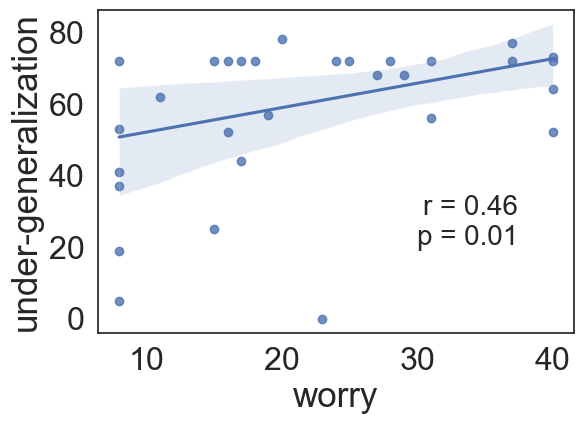


Correlation prop_toward vs somatic_anxiety:
  Pearson  r=0.280, p=0.134
  Spearman rho=0.316, p=0.0885


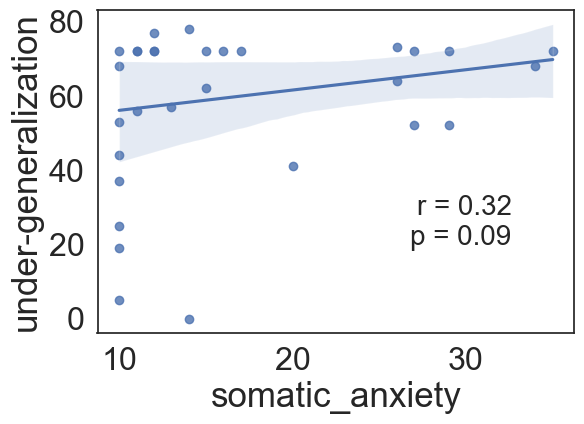


Cor(mistakes_nondangerous, worry): Pearson r=-0.243, p=0.196; Spearman ρ=-0.175, p=0.356

Cor(mistakes_nondangerous, somatic_anxiety): Pearson r=-0.287, p=0.124; Spearman ρ=-0.252, p=0.179

Cor(mistakes_dangerous, worry): Pearson r=0.404, p=0.0269; Spearman ρ=0.435, p=0.0162

Cor(mistakes_dangerous, somatic_anxiety): Pearson r=0.250, p=0.183; Spearman ρ=0.253, p=0.177

Cor(total_mistakes, worry): Pearson r=0.167, p=0.379; Spearman ρ=0.179, p=0.343

Cor(total_mistakes, somatic_anxiety): Pearson r=-0.076, p=0.689; Spearman ρ=-0.027, p=0.886

Cor(prop_shared_medium_sedan, worry): Pearson r=-0.128, p=0.708; Spearman ρ=-0.225, p=0.506

Cor(prop_shared_medium_sedan, somatic_anxiety): Pearson r=-0.158, p=0.643; Spearman ρ=-0.114, p=0.738

Cor(prop_unshared_medium_sedan, worry): Pearson r=0.527, p=0.0204; Spearman ρ=0.577, p=0.00969

Cor(prop_unshared_medium_sedan, somatic_anxiety): Pearson r=0.398, p=0.0912; Spearman ρ=0.505, p=0.0273

Cor(prop_shared_medium_car, worry): Pearson r=0.532, p=0

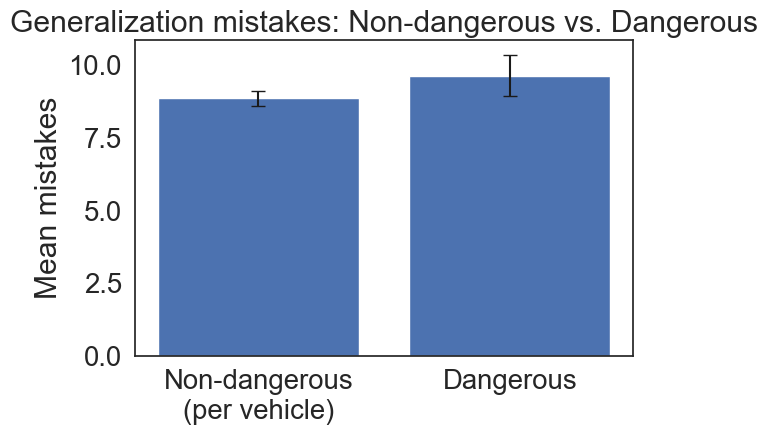

high,[np.float64(8.511111111111111), np.float64(10.266666666666667)]
low,[np.float64(9.2), np.float64(9.0)]


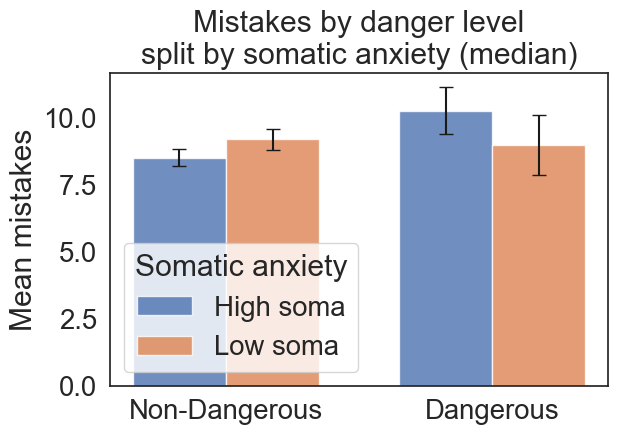

high,[np.float64(8.797101449275363), np.float64(10.565217391304348)]
low,[np.float64(9.047619047619047), np.float64(6.571428571428571)]


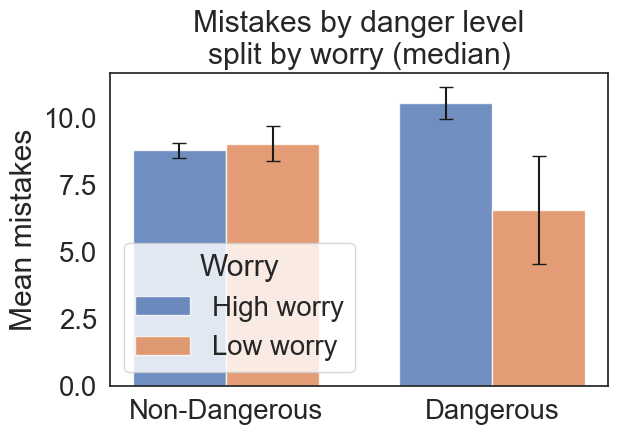

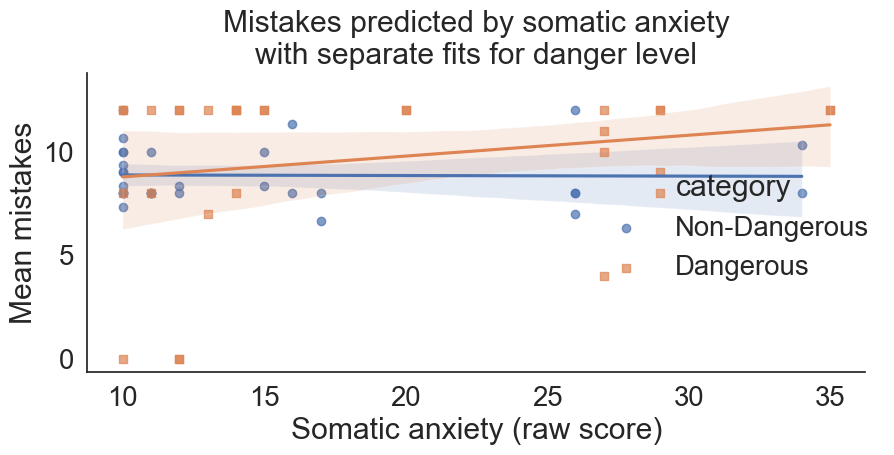

In [2]:
#!/usr/bin/env python3
"""
dangerous_vehicle_analysis.py
─────────────────────────────
Planning-phase analyses relative to each participant’s dangerous vehicle,
plus correlations with worry/somatic_anxiety, and a bar-plot of mean mistakes:
  • mean mistakes per non-dangerous vehicle (total ÷ 3)
  • mean mistakes on the dangerous vehicle (total ÷ 1)
  • with standard-error bars
"""
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

sns.set_theme(style="white",font_scale=2.1)

# ─── Configuration ────────────────────────────────────────────────────────
CSV_PATH      = "game_trials_export.csv"
SUBJECT_COL   = "prolificId"
PHASE_COL     = "phase"
VEHICLE_COL   = "vehicleType"
PLAN_COL      = "plan_seq"
DANGEROUS_COL = "dangerous_vehicle"
WORRY_COL     = "worry"
SOMA_COL      = "somatic_anxiety"

# valid-key mapping (mirror of keyToDir)
VALID_KEYS = {
    "small_car"   : ["a","d","w","x"],
    "big_car"     : ["s","f","e","c"],
    "medium_car"  : ["a","s","d","f","w","e","x","c"],
    "small_sedan" : ["g","j","y","n"],
    "big_sedan"   : ["h","k","u","m"],
    "medium_sedan": ["g","h","j","k","y","u","n","m"],
}

BIG_SMALL_SET = {"small_car","big_car","small_sedan","big_sedan"}

# ─── Helpers ─────────────────────────────────────────────────────────────
def parse_plan(seq):
    """Return list of lowercase letters f1om plan_seq (ignore non-letters)."""
    if not isinstance(seq, str):
        return []
    return [ch.lower() for ch in seq if ch.isalpha()]

def analyse_subj(df_subj):
    danger = df_subj[DANGEROUS_COL].iloc[0]
    danger_keys = set(VALID_KEYS[danger])

    # Part A – non-dangerous big/small vehicles
    dfA = df_subj[
        df_subj[VEHICLE_COL].isin(BIG_SMALL_SET) &
        (df_subj[VEHICLE_COL] != danger)
    ]
    toward = 0
    away   = 0
    for _, row in dfA.iterrows():
        valid_here = set(VALID_KEYS[row[VEHICLE_COL]])
        for k in parse_plan(row[PLAN_COL]):
            if k not in valid_here:
                if k in danger_keys:
                    toward = toward + 1
                else:
                    away   = away   + 1
    total_nondangerous = toward + away
    mistakes_nondangerous = total_nondangerous / 3.0  # mean per non-dangerous vehicle
    

    # Part A-2 – dangerous vehicle mistakes
    dfD = df_subj[df_subj[VEHICLE_COL] == danger]
    mistakes_dangerous = 0
    for _, row in dfD.iterrows():
        valid_here = set(VALID_KEYS[row[VEHICLE_COL]])
        for k in parse_plan(row[PLAN_COL]):
            if k not in valid_here:
                mistakes_dangerous = mistakes_dangerous + 1

    # Part B – medium shared vs unshared
    family = "car" if "car" in danger else "sedan"
    shared_med   = f"medium_{family}"
    unshared_med = "medium_sedan" if shared_med=="medium_car" else "medium_car"
    def prop_valid_for_danger(dfm):
        ks = [k for seq in dfm[PLAN_COL] for k in parse_plan(seq)]
        return (sum(k not in danger_keys for k in ks) /1) if ks else np.nan
    p_shared   = prop_valid_for_danger(df_subj[df_subj[VEHICLE_COL]==shared_med])
    p_unshared = prop_valid_for_danger(df_subj[df_subj[VEHICLE_COL]==unshared_med])
    prop_tow = away+p_shared+p_unshared

    return {
        "participant":                df_subj[SUBJECT_COL].iloc[0],
        "mistakes_nondangerous":      mistakes_nondangerous,
        "mistakes_dangerous":         mistakes_dangerous,
        'total_mistakes':             mistakes_dangerous+total_nondangerous,
        "toward":                     toward,
        "away":                       away,
        "prop_toward":                prop_tow,
        f"prop_shared_{shared_med}":   p_shared,
        f"prop_unshared_{unshared_med}": p_unshared,
        WORRY_COL:                    df_subj[WORRY_COL].iloc[0],
        SOMA_COL:                     df_subj[SOMA_COL].iloc[0],
    }

# ─── Main ────────────────────────────────────────────────────────────────
def main():
    df = pd.read_csv(CSV_PATH)
    df2 = df[df[PHASE_COL]==2].copy()

    # per-subject analysis
    records = []
    for _, grp in df2.groupby(SUBJECT_COL):
        records.append(analyse_subj(grp))
    res = pd.DataFrame(records)

    median_soma = res[SOMA_COL].median()
    res["somatic_anxiety_grouped"] = np.where(
        res[SOMA_COL] > median_soma, "high", "low"        # median goes to “low”
    )

    median_worry = res[WORRY_COL].median()
    res["worry_grouped"] = np.where(
        res[WORRY_COL] > median_soma, "high", "low"        # median goes to “low”
    )

    # print table
    print("\nPer-participant summary:")
    print(res.to_string(index=False))

    # compute group-level means, SDs, and SEMs
    N = len(res.dropna(subset=["mistakes_nondangerous", "mistakes_dangerous"]))
    mean_non = res["mistakes_nondangerous"].mean()
    sd_non   = res["mistakes_nondangerous"].std(ddof=1)
    sem_non  = sd_non / np.sqrt(N)
    mean_d   = res["mistakes_dangerous"].mean()
    sd_d     = res["mistakes_dangerous"].std(ddof=1)
    sem_d    = sd_d / np.sqrt(N)

    print(f"\nMean mistakes per non-dangerous vehicle: {mean_non:.2f} ± {sd_non:.2f}  (SEM={sem_non:.2f})")
    print(f"Mean mistakes (dangerous vehicle):         {mean_d:.2f} ± {sd_d:.2f}  (SEM={sem_d:.2f})")

    # paired t-test
    t_nd = stats.ttest_ind(res["mistakes_nondangerous"],
                           res["mistakes_dangerous"],
                           nan_policy="omit")
    print(f"\nPaired t-test (non vs dangerous): t={t_nd.statistic:.3f}, p={t_nd.pvalue:.3g}")

    # correlations with worry & somatic_anxiety
    for col in [WORRY_COL, SOMA_COL]:
        sub = res[["prop_toward", col]].dropna()
        pear  = stats.pearsonr(sub["prop_toward"], sub[col])
        spear = stats.spearmanr(sub["prop_toward"], sub[col])
        
        print(f"\nCorrelation prop_toward vs {col}:")
        print(f"  Pearson  r={pear[0]:.3f}, p={pear[1]:.3g}")
        print(f"  Spearman rho={spear.correlation:.3f}, p={spear.pvalue:.3g}")
        
        ax=sns.regplot(x=col,y='prop_toward',robust=True,data=sub)
        plt.ylabel('under-generalization')

        txt = f"r = {spear[0]:.2f}\np = {spear[1]:.2f}"
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        ax.text(xmax*0.9, ymax*0.4, txt,ha="right", va="top", fontsize=20,bbox=dict(facecolor="white", alpha=1.0, edgecolor="none"))
        plt.tight_layout()
        plt.savefig('avoidance_{}_study2.png'.format(col),dpi=300)
        plt.show()
        
    
    # correlations: mistakes vs questionnaires
    for measure in ["mistakes_nondangerous", "mistakes_dangerous","total_mistakes"]:
        for col in [WORRY_COL, SOMA_COL]:
            sub = res[[measure, col]].dropna()
            pear  = stats.pearsonr(sub[measure], sub[col])
            spear = stats.spearmanr(sub[measure], sub[col])
            print(f"\nCor({measure}, {col}): Pearson r={pear[0]:.3f}, p={pear[1]:.3g}; "
                  f"Spearman ρ={spear.correlation:.3f}, p={spear.pvalue:.3g}")
    for measure in ["prop_shared_medium_sedan", "prop_unshared_medium_sedan"]:
        for col in [WORRY_COL, SOMA_COL]:
            sub = res[[measure, col]].dropna()
            pear  = stats.pearsonr(sub[measure], sub[col])
            spear = stats.spearmanr(sub[measure], sub[col])
            print(f"\nCor({measure}, {col}): Pearson r={pear[0]:.3f}, p={pear[1]:.3g}; "
                  f"Spearman ρ={spear.correlation:.3f}, p={spear.pvalue:.3g}")

    for measure in ["prop_shared_medium_car", "prop_unshared_medium_car"]:
        for col in [WORRY_COL, SOMA_COL]:
            sub = res[[measure, col]].dropna()
            pear  = stats.pearsonr(sub[measure], sub[col])
            spear = stats.spearmanr(sub[measure], sub[col])
            print(f"\nCor({measure}, {col}): Pearson r={pear[0]:.3f}, p={pear[1]:.3g}; "
                  f"Spearman ρ={spear.correlation:.3f}, p={spear.pvalue:.3g}")
    # ─── Bar chart with SEM ────────────────────────────────────────────────
    sns.set_theme(style="white",font_scale=1.8)

    labels = ["Non-dangerous\n(per vehicle)", "Dangerous"]
    means  = [mean_non, mean_d]
    sems   = [sem_non, sem_d]

    plt.figure()
    plt.bar(labels, means, yerr=sems, capsize=5)
    plt.ylabel("Mean mistakes")
    plt.title("Generalization mistakes: Non-dangerous vs. Dangerous")
    plt.tight_layout()
    plt.show()

 # ── ► NEW plot: mistakes × danger × somatic-anxiety ──────────────────
    # median split on somatic anxiety
   
    
    # group means & SEM
        # ── NEW: summary table for the plot ─────────────────────────────────
    grp = (
        res.groupby("somatic_anxiety_grouped")
           .agg(rel_mean  = ("mistakes_nondangerous",  "mean"),
                rel_sem   = ("mistakes_nondangerous",  lambda x: x.std(ddof=1)/np.sqrt(len(x))),
                dang_mean = ("mistakes_dangerous", "mean"),
                dang_sem  = ("mistakes_dangerous", lambda x: x.std(ddof=1)/np.sqrt(len(x))))
    )


        # ── NEW plot: mistakes × danger × somatic-anxiety ──────────────────
    x      = np.arange(2)        # 0 = non-dangerous, 1 = dangerous
    width  = 0.35
    fig2, ax2 = plt.subplots()

    for i, (label, row) in enumerate(grp.iterrows()):
        offset = (i - 0.5) * width
        means  = [row["rel_mean"],  row["dang_mean"]]
        print('{},{}'.format(label,means))
        sems   = [row["rel_sem"],   row["dang_sem"]]
        ax2.bar(x + offset, means, width,
                yerr=sems, capsize=5, alpha=0.8,
                label=f"{label.capitalize()} soma")

    ax2.set_xticks(x)
    ax2.set_xticklabels(["Non-Dangerous", "Dangerous"])
    ax2.set_ylabel("Mean mistakes")
    ax2.set_title("Mistakes by danger level\nsplit by somatic anxiety (median)")
    ax2.legend(title="Somatic anxiety")
    fig2.tight_layout()


    # ── Show all figures ─────────────────────────────────────────────────
    plt.show()

    grp2 = (
        res.groupby("worry_grouped")
           .agg(rel_mean  = ("mistakes_nondangerous",  "mean"),
                rel_sem   = ("mistakes_nondangerous",  lambda x: x.std(ddof=1)/np.sqrt(len(x))),
                dang_mean = ("mistakes_dangerous", "mean"),
                dang_sem  = ("mistakes_dangerous", lambda x: x.std(ddof=1)/np.sqrt(len(x))))
    )


        # ── NEW plot: mistakes × danger × worry ──────────────────
    x      = np.arange(2)        # 0 = non-dangerous, 1 = dangerous
    width  = 0.35
    fig2, ax2 = plt.subplots()

    for i, (label, row) in enumerate(grp2.iterrows()):
        offset = (i - 0.5) * width
        means  = [row["rel_mean"],  row["dang_mean"]]
        print('{},{}'.format(label,means))
        sems   = [row["rel_sem"],   row["dang_sem"]]
        ax2.bar(x + offset, means, width,
                yerr=sems, capsize=5, alpha=0.8,
                label=f"{label.capitalize()} worry")

    ax2.set_xticks(x)
    ax2.set_xticklabels(["Non-Dangerous", "Dangerous"])
    ax2.set_ylabel("Mean mistakes")
    ax2.set_title("Mistakes by danger level\nsplit by worry (median)")
    ax2.legend(title="Worry")
    fig2.tight_layout()


    # ── Show all figures ─────────────────────────────────────────────────
    plt.savefig('worry_mistakes_danger_versus_nondanger_study2.png',dpi=300)
    plt.show()

    # ── NEW plot: mistakes ~ somatic anxiety (separate fits) ─────────────
    df_long = pd.DataFrame({
        "somatic_anxiety": np.repeat(res[SOMA_COL].values, 2),
        "mistakes": np.concatenate([res["mistakes_nondangerous"].values,
                                    res["mistakes_dangerous"].values]),
        "category": (["Non-Dangerous"] * len(res)) + (["Dangerous"] * len(res))
    })

   
    sns.lmplot(data=df_long,
               x="somatic_anxiety",
               y="mistakes",
               hue="category",
               height=5, aspect=1.3,
               markers=["o", "s"],
               scatter_kws=dict(alpha=0.7))

    plt.xlabel("Somatic anxiety (raw score)")
    plt.ylabel("Mean mistakes")
    plt.title("Mistakes predicted by somatic anxiety\nwith separate fits for danger level")
    plt.tight_layout()
    
    plt.show()


if __name__ == "__main__":
    main()


# threat bias analysis study 1 (easier); n=20


Per-participant summary:
             participant  mistakes_relevant  mistakes_dangerous  toward  away  prop_toward  prop_shared_medium_car  prop_unshared_dump_truck  worry  somatic_anxiety  prop_shared_dump_truck  prop_unshared_medium_car somatic_anxiety_grouped worry_grouped
5af5a5c3226ed5000133d67c               5.75                   8       9    14         42.0                    11.0                      17.0     12               11                     NaN                       NaN                     low           low
5c5ca0ce4ee81200018eaf51               5.00                   6       6    14         52.0                     NaN                       NaN     14               10                    16.0                      22.0                     low           low
5cbe04b4f429ff00159de30e               4.50                   8       9     9         44.0                    17.0                      18.0     13               10                     NaN                       NaN 

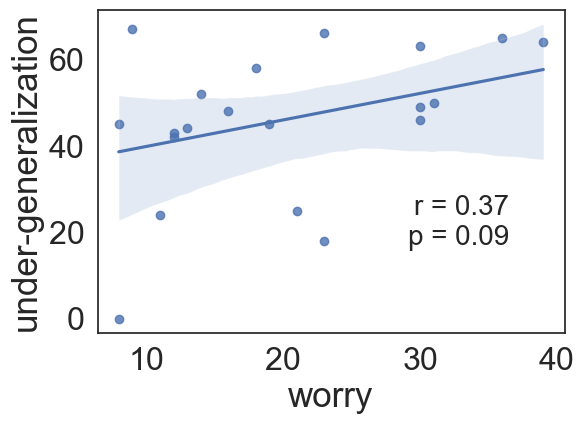


Cor(prop_toward, somatic_anxiety): Pearson r=0.433, p=0.0497; Spearman ρ=0.381, p=0.0879


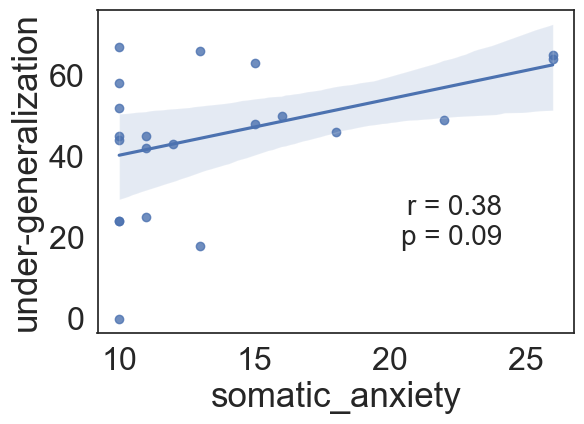


Cor(mistakes_relevant, worry): Pearson r=0.234, p=0.307; Spearman ρ=0.012, p=0.96

Cor(mistakes_relevant, somatic_anxiety): Pearson r=0.178, p=0.44; Spearman ρ=0.076, p=0.743

Cor(mistakes_dangerous, worry): Pearson r=0.332, p=0.142; Spearman ρ=0.308, p=0.174

Cor(mistakes_dangerous, somatic_anxiety): Pearson r=0.456, p=0.0376; Spearman ρ=0.369, p=0.0993


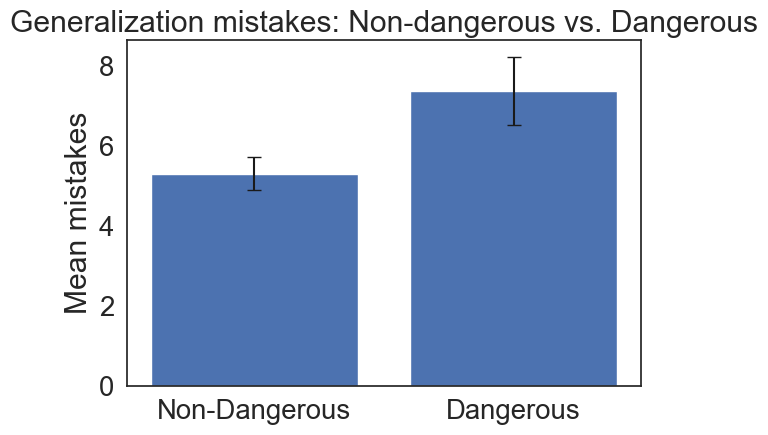

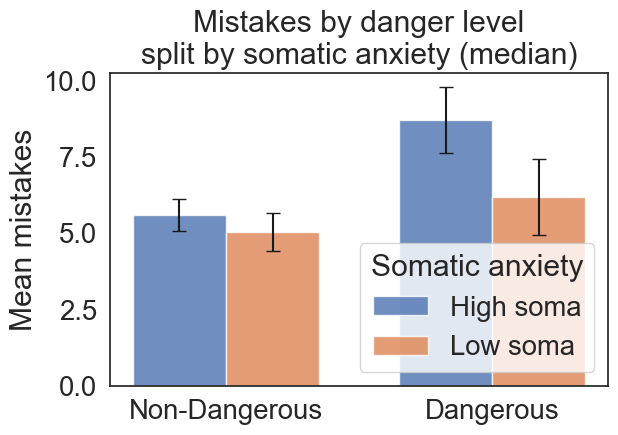

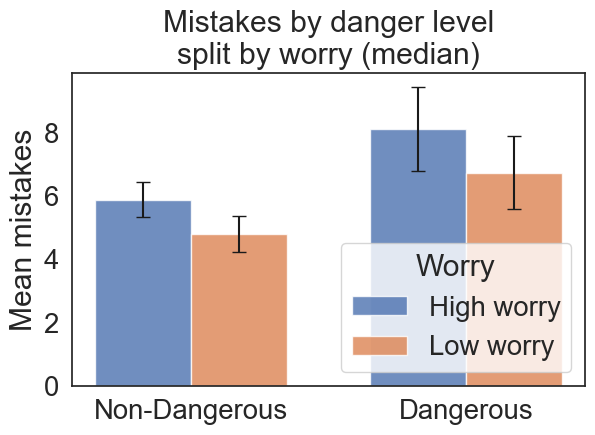

In [28]:
#!/usr/bin/env python3
"""
dangerous_vehicle_analysis_v2.py
─────────────────────────────────
Planning-phase analyses for Study 2, with cars and trucks.

Vehicles:
  • small_car
  • big_car
  • truck
  • pickup_truck
Irrelevant vehicles (like “medium”):
  • medium_car
  • dump_truck

Columns expected in `game_trials_export.csv`:
  participant_id, phase, vehicleType, plan_seq,
  dangerous_vehicle, worry, somatic_anxiety

Analyses:
  1. Part A – relevant vehicles (small_car, big_car, truck, pickup_truck),
     excluding each subject’s dangerous vehicle:
       • count mistakes “toward” vs. “away” from dangerous vehicle keys
       • compute mean mistakes per relevant vehicle (total ÷ 4)
  2. Part A-2 – mistakes on the dangerous vehicle itself
  3. Part B – irrelevant vehicles (medium_car, dump_truck):
       • separate into “shared” vs. “unshared” irrelevant w.r.t. danger family
       • compute proportion of keys valid for dangerous vehicle
  4. Correlations of prop_toward with worry & somatic_anxiety
  5. Bar chart of mean mistakes (relevant vs. dangerous) with SEM
  6. ► NEW ◄  Bar chart of mean mistakes split by low/high somatic anxiety
"""

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white",font_scale=2.1)
# ─── Config ───────────────────────────────────────────────────────────────
CSV_PATH      = "game_trials_export_v1.csv"
SUBJECT_COL   = "prolificId"
PHASE_COL     = "phase"
VEHICLE_COL   = "vehicleType"
PLAN_COL      = "plan_seq"
DANGEROUS_COL = "dangerous_vehicle"
WORRY_COL     = "worry"
SOMA_COL      = "somatic_anxiety"

# valid-key assignments for Study 2
car_up           = {"e", "c"}
all_truck_up     = {"t", "b"}
small_car_lr     = {"q", "w"}
big_car_lr       = {"z", "x"}
truck_lr         = {"n", "m"}
pickup_truck_lr  = {"y", "u"}

VALID_KEYS = {
    "small_car"     : small_car_lr    | car_up,
    "big_car"       : big_car_lr      | car_up,
    "truck"         : truck_lr        | all_truck_up,
    "pickup_truck"  : pickup_truck_lr | all_truck_up,
    "medium_car"    : car_up,         # shared keys between small & big cars
    "dump_truck"    : all_truck_up,   # shared keys between dump & pickup trucks
}

RELEVANT_SET   = {"small_car", "big_car", "truck", "pickup_truck"}
IRRELEVANT_SET = {"medium_car", "dump_truck"}

# ─── Helpers ──────────────────────────────────────────────────────────────
def parse_plan(seq):
    if not isinstance(seq, str):
        return []
    return [ch.lower() for ch in seq if ch.isalpha()]

def analyse_subj(df):
    subj   = df[SUBJECT_COL].iat[0]
    danger = df[DANGEROUS_COL].iat[0]
    danger_keys = VALID_KEYS[danger]

    # Part A – relevant vehicles (exclude dangerous)
    df_rel = df[df[VEHICLE_COL].isin(RELEVANT_SET) & (df[VEHICLE_COL] != danger)]
    toward = 0
    away   = 0
    for _, row in df_rel.iterrows():
        valid_here = VALID_KEYS[row[VEHICLE_COL]]
        for k in parse_plan(row[PLAN_COL]):
            if k not in valid_here:
                if k in danger_keys:
                    toward += 1
                else:
                    away   += 1
    total_rel = toward + away
    mistakes_relevant = total_rel / 4.0       # mean per relevant vehicle
    

    # Part A-2 – dangerous vehicle mistakes
    df_dang = df[df[VEHICLE_COL] == danger]
    mistakes_danger = 0
    for _, row in df_dang.iterrows():
        valid_here = VALID_KEYS[row[VEHICLE_COL]]
        for k in parse_plan(row[PLAN_COL]):
            if k not in valid_here:
                mistakes_danger += 1

    # Part B – irrelevant vehicles shared vs unshared
    if danger in {"small_car", "big_car"}:
        shared_irrel, unshared_irrel = "medium_car", "dump_truck"
    else:
        shared_irrel, unshared_irrel = "dump_truck", "medium_car"
    
    
    def prop_valid_for_danger(df_block):
        ks = [k for s in df_block[PLAN_COL] for k in parse_plan(s)]
        return (sum(k not in danger_keys for k in ks) / 1) if ks else np.nan
        

    p_shared   = prop_valid_for_danger(df[df[VEHICLE_COL] == shared_irrel])
    p_unshared = prop_valid_for_danger(df[df[VEHICLE_COL] == unshared_irrel])
    prop_toward       = away+p_shared+p_unshared

    return {
        "participant":                   subj,
        "mistakes_relevant":             mistakes_relevant,
        "mistakes_dangerous":            mistakes_danger,
        "toward":                        toward,
        "away":                          away,
        "prop_toward":                   prop_toward,
        f"prop_shared_{shared_irrel}":   p_shared,
        f"prop_unshared_{unshared_irrel}": p_unshared,
        WORRY_COL:                       df[WORRY_COL].iat[0],
        SOMA_COL:                        df[SOMA_COL].iat[0],
    }

# ─── Main ─────────────────────────────────────────────────────────────────
def main():
    df = pd.read_csv(CSV_PATH)
    df2 = df[df[PHASE_COL] == 2]

    records = [analyse_subj(grp) for _, grp in df2.groupby(SUBJECT_COL)]
    res = pd.DataFrame(records)
    median_soma = res[SOMA_COL].median()
    res["somatic_anxiety_grouped"] = np.where(
        res[SOMA_COL] > median_soma, "high", "low"        # median goes to “low”
    )

    median_worry = res[WORRY_COL].median()
    res["worry_grouped"] = np.where(
        res[WORRY_COL] > median_worry, "high", "low"        # median goes to “low”
    )

    # print per-subject
    print("\nPer-participant summary:")
    print(res.to_string(index=False))

    # group stats
    N = len(res)
    mnr  = res["mistakes_relevant"].mean();  snr = res["mistakes_relevant"].std(ddof=1)
    sem_nr = snr / np.sqrt(N)
    md   = res["mistakes_dangerous"].mean(); sd  = res["mistakes_dangerous"].std(ddof=1)
    sem_d = sd / np.sqrt(N)

    print(f"\nMean mistakes/relevant vehicle:  {mnr:.2f} ± {snr:.2f} (SEM={sem_nr:.2f})")
    print(f"Mean mistakes/dangerous vehicle: {md:.2f} ± {sd:.2f} (SEM={sem_d:.2f})")

    t_rel = stats.ttest_rel(res["mistakes_relevant"],
                            res["mistakes_dangerous"],
                            nan_policy="omit")
    print(f"\nPaired t-test: t={t_rel.statistic:.3f}, p={t_rel.pvalue:.3g}")

    # correlations
    for col in [WORRY_COL, SOMA_COL]:
        sub = res[["prop_toward", col]].dropna()
        
        pear  = stats.pearsonr(sub["prop_toward"], sub[col])
        spear = stats.spearmanr(sub["prop_toward"], sub[col])
        print(f"\nCor(prop_toward, {col}): Pearson r={pear[0]:.3f}, p={pear[1]:.3g}; "
              f"Spearman ρ={spear.correlation:.3f}, p={spear.pvalue:.3g}")
        ax=sns.regplot(x=col,y='prop_toward',robust=True,data=sub)
        plt.ylabel('under-generalization')
        txt = f"r = {spear[0]:.2f}\np = {spear[1]:.2f}"
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        ax.text(xmax*0.9, ymax*0.4, txt,ha="right", va="top", fontsize=20,bbox=dict(facecolor="white", alpha=1.0, edgecolor="none"))
        plt.tight_layout()
        plt.savefig('avoidance_{}_study1.png'.format(col),dpi=300)
        plt.show()

    # correlations: mistakes vs questionnaires
    for measure in ["mistakes_relevant", "mistakes_dangerous"]:
        for col in [WORRY_COL, SOMA_COL]:
            sub = res[[measure, col]].dropna()
            pear  = stats.pearsonr(sub[measure], sub[col])
            spear = stats.spearmanr(sub[measure], sub[col])
            print(f"\nCor({measure}, {col}): Pearson r={pear[0]:.3f}, p={pear[1]:.3g}; "
                  f"Spearman ρ={spear.correlation:.3f}, p={spear.pvalue:.3g}")

    # ── Plot 1: overall mean mistakes (existing) ──────────────────────────
    sns.set_theme(style="white",font_scale=1.8)

    labels = ["Non-Dangerous", "Dangerous"]
    means  = [mnr, md]
    sems   = [sem_nr, sem_d]

    plt.figure()
    plt.bar(labels, means, yerr=sems, capsize=5)
    plt.ylabel("Mean mistakes")
    plt.title("Generalization mistakes: Non-dangerous vs. Dangerous")
    plt.tight_layout()

    # ── ► NEW plot: mistakes × danger × somatic-anxiety ──────────────────
    # median split on somatic anxiety
   
    # group means & SEM
        # ── NEW: summary table for the plot ─────────────────────────────────
    grp = (
        res.groupby("somatic_anxiety_grouped")
           .agg(rel_mean  = ("mistakes_relevant",  "mean"),
                rel_sem   = ("mistakes_relevant",  lambda x: x.std(ddof=1)/np.sqrt(len(x))),
                dang_mean = ("mistakes_dangerous", "mean"),
                dang_sem  = ("mistakes_dangerous", lambda x: x.std(ddof=1)/np.sqrt(len(x))))
    )

    grp2 = (
        res.groupby("worry_grouped")
           .agg(rel_mean  = ("mistakes_relevant",  "mean"),
                rel_sem   = ("mistakes_relevant",  lambda x: x.std(ddof=1)/np.sqrt(len(x))),
                dang_mean = ("mistakes_dangerous", "mean"),
                dang_sem  = ("mistakes_dangerous", lambda x: x.std(ddof=1)/np.sqrt(len(x))))
    )

        # ── NEW plot: mistakes × danger × somatic-anxiety ──────────────────
    x      = np.arange(2)        # 0 = non-dangerous, 1 = dangerous
    width  = 0.35
    fig2, ax2 = plt.subplots()

    for i, (label, row) in enumerate(grp.iterrows()):
        offset = (i - 0.5) * width
        means  = [row["rel_mean"],  row["dang_mean"]]
        sems   = [row["rel_sem"],   row["dang_sem"]]
        ax2.bar(x + offset, means, width,
                yerr=sems, capsize=5, alpha=0.8,
                label=f"{label.capitalize()} soma")

    ax2.set_xticks(x)
    ax2.set_xticklabels(["Non-Dangerous", "Dangerous"])
    ax2.set_ylabel("Mean mistakes")
    ax2.set_title("Mistakes by danger level\nsplit by somatic anxiety (median)")
    ax2.legend(title="Somatic anxiety")
    fig2.tight_layout()


    # ── Show all figures ─────────────────────────────────────────────────
    plt.show()

    x      = np.arange(2)        # 0 = non-dangerous, 1 = dangerous
    width  = 0.35
    fig2, ax2 = plt.subplots()

    for i, (label, row) in enumerate(grp2.iterrows()):
        offset = (i - 0.5) * width
        means  = [row["rel_mean"],  row["dang_mean"]]
        sems   = [row["rel_sem"],   row["dang_sem"]]
        ax2.bar(x + offset, means, width,
                yerr=sems, capsize=5, alpha=0.8,
                label=f"{label.capitalize()} worry")

    ax2.set_xticks(x)
    ax2.set_xticklabels(["Non-Dangerous", "Dangerous"])
    ax2.set_ylabel("Mean mistakes")
    ax2.set_title("Mistakes by danger level\nsplit by worry (median)")
    ax2.legend(title="Worry")
    fig2.tight_layout()


    # ── Show all figures ─────────────────────────────────────────────────
    plt.show()

if __name__ == "__main__":
    main()
